In [ ]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
df = pd.read_csv("/content/data.csv")
df.head(5)

,id,bin_1,bin_2,City,Ord_1,Ord_2,Target
0,0,F,N,Delhi,Hot,High School,0
1,1,F,Y,Bangalore,Warm,Masters,1
2,2,M,N,Mumbai,Very Hot,Diploma,1
3,3,M,Y,Chennai,Cold,Bachelors,0
4,4,M,Y,Delhi,Cold,Bachelors,1


In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10 non-null     int64 
 1   bin_1   10 non-null     object
 2   bin_2   10 non-null     object
 3   City    10 non-null     object
 4   Ord_1   10 non-null     object
 5   Ord_2   10 non-null     object
 6   Target  10 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 688.0+ bytes


id        0
bin_1     0
bin_2     0
City      0
Ord_1     0
Ord_2     0
Target    0
dtype: int64

<Axes: xlabel='Ord_2', ylabel='count'>

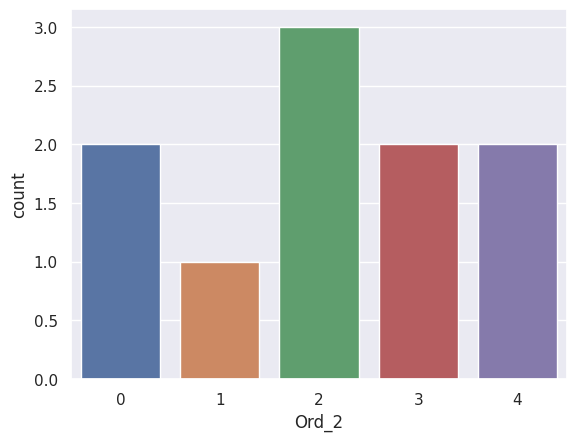

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Ord_2'] = le.fit_transform(df['Ord_2'])
sbn.set(style ="darkgrid")
sbn.countplot(x ='Ord_2', data = df)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc = enc.fit_transform(df[['City']]).toarray()
encoded_colm = pd.DataFrame(enc)
df = pd.concat([df, encoded_colm], axis=1)
df = df.drop(['City'], axis=1)
df.head(10)

,id,bin_1,bin_2,Ord_1,Ord_2,Target,0,1,2,3
0,0,F,N,Hot,2,0,0.0,0.0,1.0,0.0
1,1,F,Y,Warm,3,1,1.0,0.0,0.0,0.0
2,2,M,N,Very Hot,1,1,0.0,0.0,0.0,1.0
3,3,M,Y,Cold,0,0,0.0,1.0,0.0,0.0
4,4,M,Y,Cold,0,1,0.0,0.0,1.0,0.0
5,5,F,N,Very Hot,3,0,0.0,0.0,1.0,0.0
6,6,M,N,Warm,4,1,0.0,1.0,0.0,0.0
7,7,F,N,Hot,2,1,0.0,1.0,0.0,0.0
8,8,M,N,Very Hot,2,0,0.0,0.0,1.0,0.0
9,9,F,Y,Warm,4,0,0.0,0.0,1.0,0.0


In [ ]:
df = pd.get_dummies(df, prefix=['Ord_2'], columns=['Ord_2'])
df.head(10)

,id,bin_1,bin_2,Ord_1,Target,0,1,2,3,Ord_2_0,Ord_2_1,Ord_2_2,Ord_2_3,Ord_2_4
0,0,F,N,Hot,0,0.0,0.0,1.0,0.0,0,0,1,0,0
1,1,F,Y,Warm,1,1.0,0.0,0.0,0.0,0,0,0,1,0
2,2,M,N,Very Hot,1,0.0,0.0,0.0,1.0,0,1,0,0,0
3,3,M,Y,Cold,0,0.0,1.0,0.0,0.0,1,0,0,0,0
4,4,M,Y,Cold,1,0.0,0.0,1.0,0.0,1,0,0,0,0
5,5,F,N,Very Hot,0,0.0,0.0,1.0,0.0,0,0,0,1,0
6,6,M,N,Warm,1,0.0,1.0,0.0,0.0,0,0,0,0,1
7,7,F,N,Hot,1,0.0,1.0,0.0,0.0,0,0,1,0,0
8,8,M,N,Very Hot,0,0.0,0.0,1.0,0.0,0,0,1,0,0
9,9,F,Y,Warm,0,0.0,0.0,1.0,0.0,0,0,0,0,1


In [ ]:
df = pd.get_dummies(df, prefix=['Ord_1'], columns=['Ord_1'])
df.head(10)

,id,bin_1,bin_2,Target,0,1,2,3,Ord_2_0,Ord_2_1,Ord_2_2,Ord_2_3,Ord_2_4,Ord_1_Cold,Ord_1_Hot,Ord_1_Very Hot,Ord_1_Warm
0,0,F,N,0,0.0,0.0,1.0,0.0,0,0,1,0,0,0,1,0,0
1,1,F,Y,1,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,1
2,2,M,N,1,0.0,0.0,0.0,1.0,0,1,0,0,0,0,0,1,0
3,3,M,Y,0,0.0,1.0,0.0,0.0,1,0,0,0,0,1,0,0,0
4,4,M,Y,1,0.0,0.0,1.0,0.0,1,0,0,0,0,1,0,0,0
5,5,F,N,0,0.0,0.0,1.0,0.0,0,0,0,1,0,0,0,1,0
6,6,M,N,1,0.0,1.0,0.0,0.0,0,0,0,0,1,0,0,0,1
7,7,F,N,1,0.0,1.0,0.0,0.0,0,0,1,0,0,0,1,0,0
8,8,M,N,0,0.0,0.0,1.0,0.0,0,0,1,0,0,0,0,1,0
9,9,F,Y,0,0.0,0.0,1.0,0.0,0,0,0,0,1,0,0,0,1
